# Machine Learning Assignment 2

## Lung Cancer classifier using Random Forest Classifier algorithm

IT18160512 - Ganegoda R.D 

IT19234694 - S.D. Thewahettige 

IT19214962 - Alagiyawanna A.M.A.R.P

IT19233840 - Pethiyagoda R.M.S.U.B

# 1. Importing Data

In [1]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.metrics as sm
%matplotlib inline

In [2]:
# Read dataset
lung_cancer = pd.read_csv("LungCancerData.csv")

In [3]:
#Read the dataset and display first 5 rows
lung_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# 2. EXPLORING THE DATA

In [4]:
# Key values in the dictionary
lung_cancer.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [5]:
#get the counts of rows and columns in the data set
lung_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
# Get the new count of the number of rows and columns
lung_cancer.shape

(569, 32)

In [7]:
# Display the data types 
lung_cancer.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

# 3.DATA PREPROCESSING

In [8]:
# Count the empty values in each column
lung_cancer.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [9]:
# Checking if any duplicates in "id" column by finding unique values and if their frequency is greater than 1
lung_cancer.id.value_counts().unique()

array([1], dtype=int64)

In [10]:
lung_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [11]:
lung_cancer.duplicated().sum()

0

In [12]:
# Checking if any duplicate values in the df
lung_cancer.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [13]:
# To check presence of missing (NaN) values
lung_cancer.isnull().any()

id                   False
diagnosis            False
radius_mean          False
texture_mean         False
perimeter_mean       False
area_mean            False
smoothness_mean      False
compactness_mean     False
concavity_mean       False
points_mean          False
symmetry_mean        False
dimension_mean       False
radius_se            False
texture_se           False
perimeter_se         False
area_se              False
smoothness_se        False
compactness_se       False
concavity_se         False
points_se            False
symmetry_se          False
dimension_se         False
radius_worst         False
texture_worst        False
perimeter_worst      False
area_worst           False
smoothness_worst     False
compactness_worst    False
concavity_worst      False
points_worst         False
symmetry_worst       False
dimension_worst      False
dtype: bool

In [14]:
lung_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [15]:
lung_cancer.shape

(569, 32)

In [16]:
# Mapping string value feature to numerical value feature using map function
cancer_mapping = {'B':0, 'M':1}
lung_cancer.diagnosis = lung_cancer.diagnosis.map(cancer_mapping)

In [17]:
# afer maping show first five raws of the df
lung_cancer.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,...,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
1,8910251,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,...,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
2,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,...,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
3,868871,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,...,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
4,9012568,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,...,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
5,906539,0,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
6,925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,...,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
7,87880,1,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,...,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
8,862989,0,10.49,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,...,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552
9,89827,0,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,...,11.92,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080


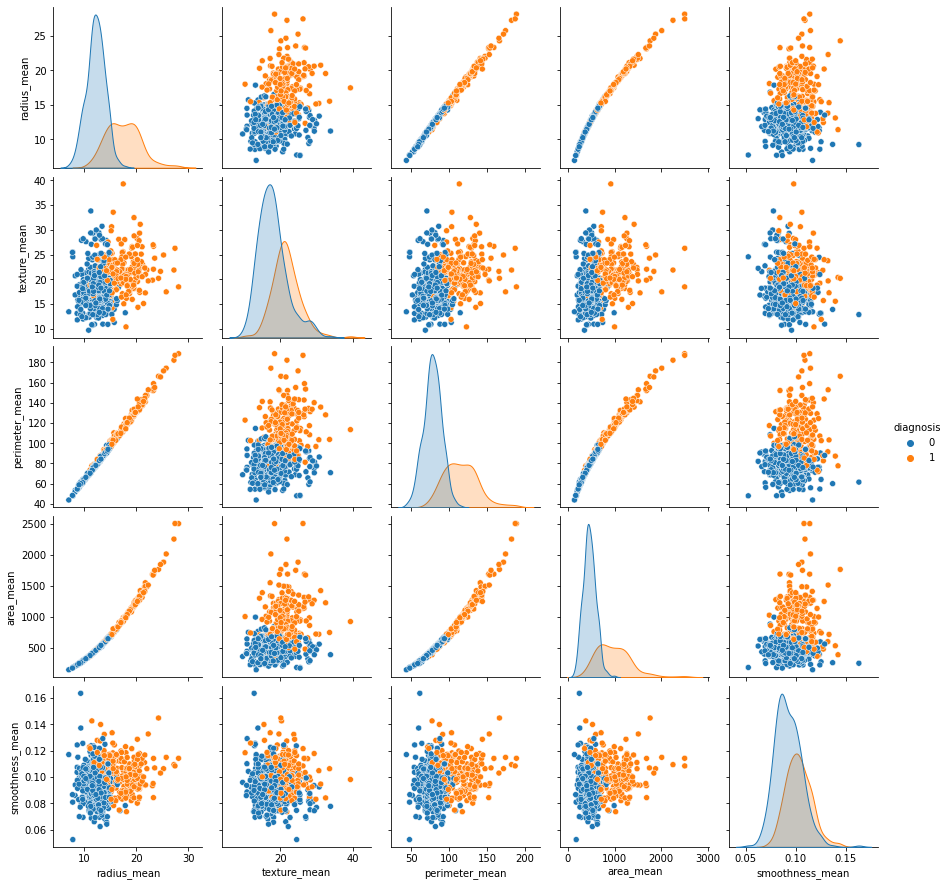

In [18]:
# Visualising selected features by target:
sb.pairplot(lung_cancer, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'] )

# 4.VISUALIZING THE DATA

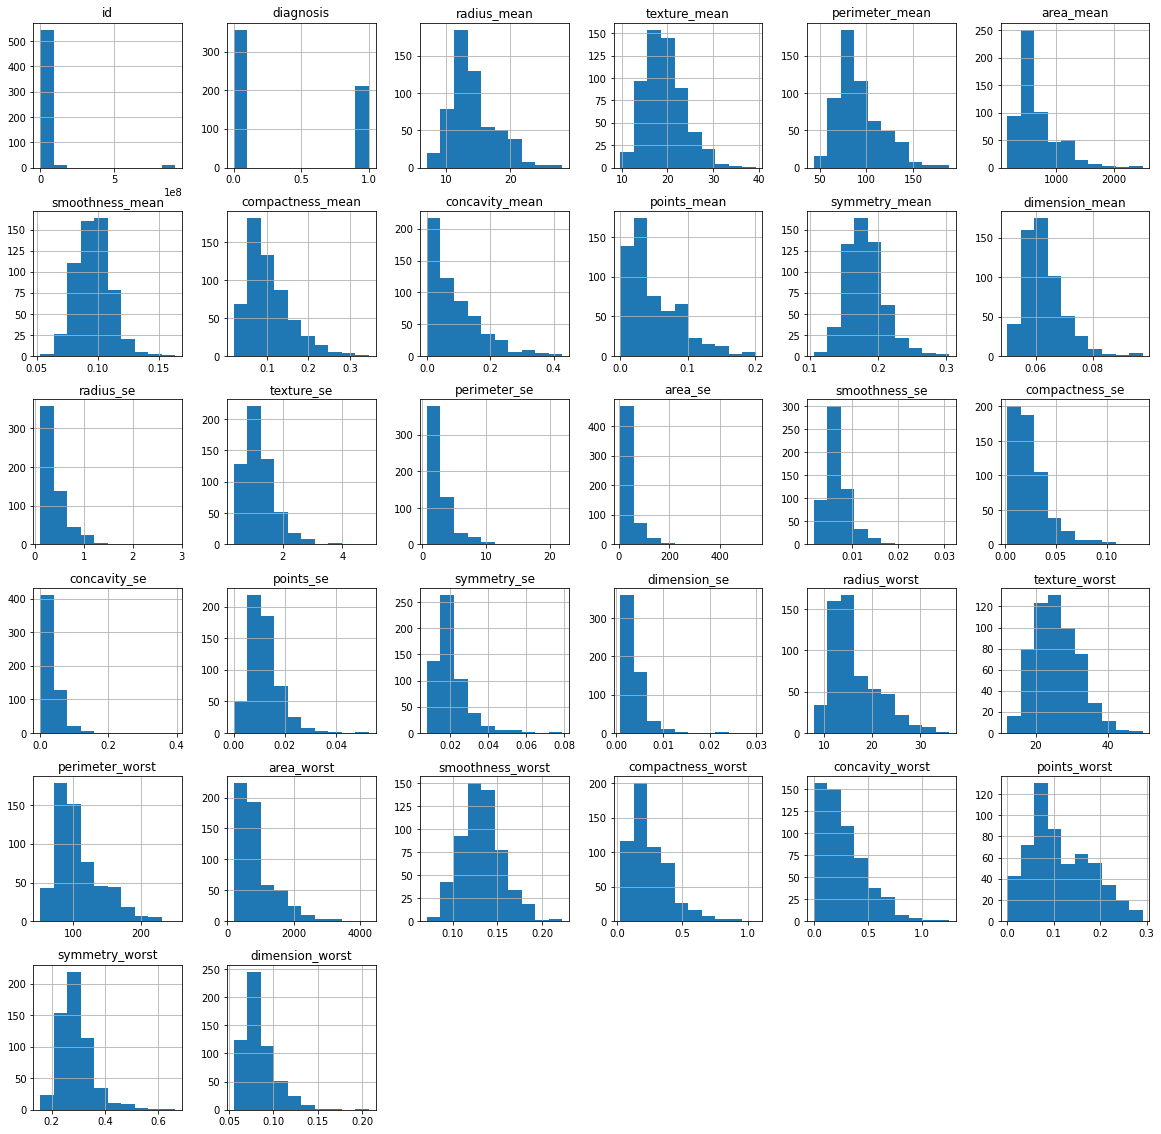

In [19]:
# Getting insight of data distribution based on frequency of unique values in the features
lung_cancer.hist(figsize=(20,20))
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

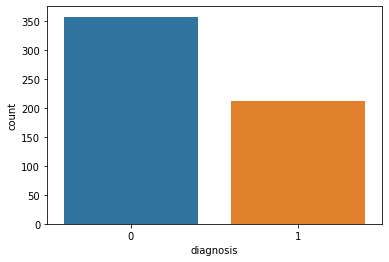

In [20]:
# 357 benign (1), 212 malignant (0)
sb.countplot(lung_cancer['diagnosis'], label = "Count") 

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

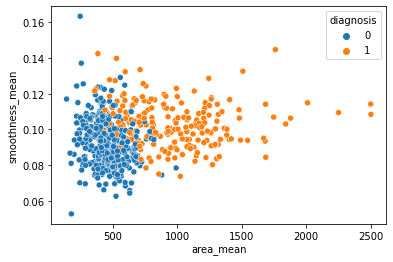

In [21]:
sb.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = lung_cancer)

<AxesSubplot:>

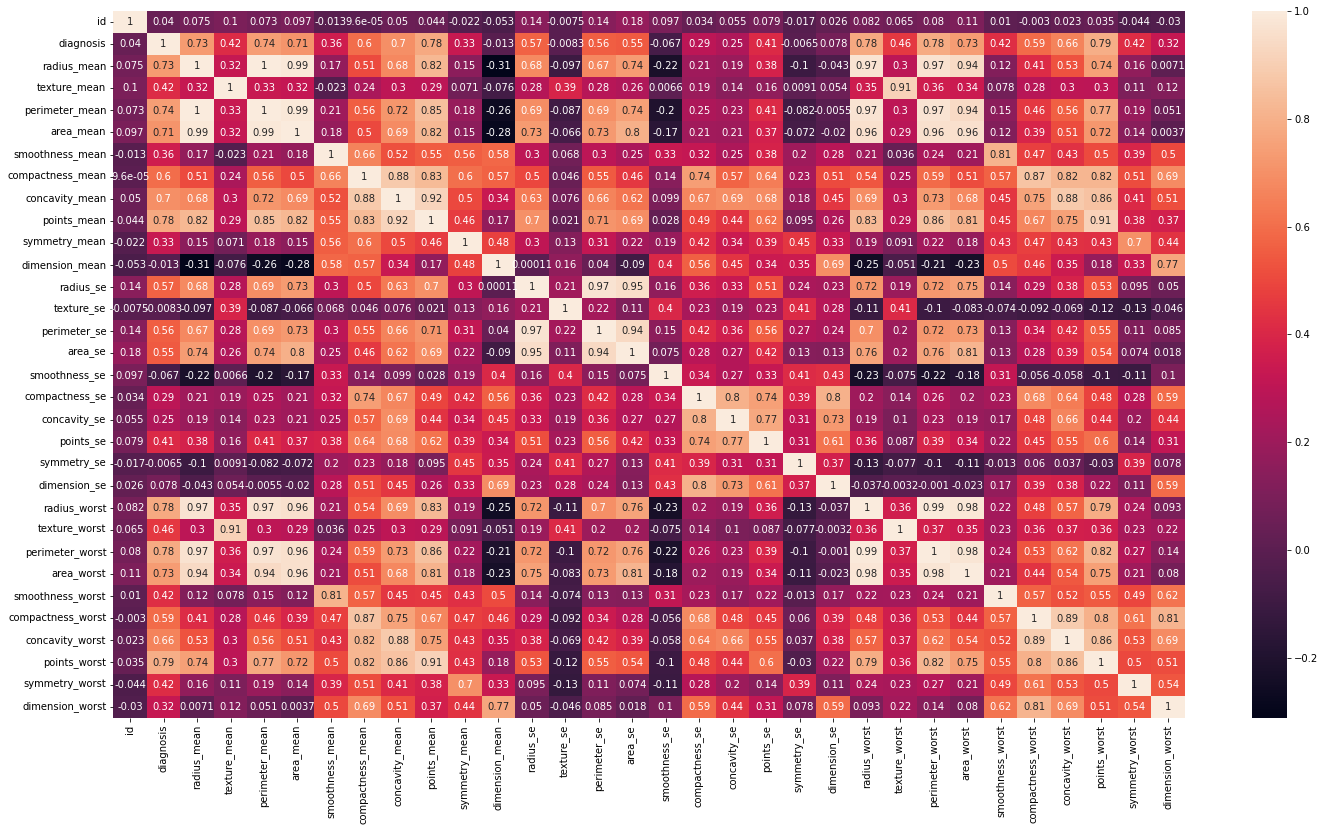

In [22]:
# Visualize the correlation 
plt.figure(figsize=(24,13)) 
sb.heatmap(lung_cancer.corr(), annot=True) 